# Genetic Load in non-equilibrium

(c) 2020 Tom Röschinger. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

***

In this notebook we compute the genetic load and resulting optimal lengths.

In [8]:
using LambertW, Jedi, Plots, CSV, DataFrames, Statistics, Measures, Jevo, LaTeXStrings, JLD
Jedi.default_gr!()

Plots.GRBackend()

$l_\mathrm{opt} = l_0\sqrt{\frac{n^2}{\epsilon\beta \lambda (n-1)}(1+\kappa)}.$

First, write down the length scale as a function.

In [48]:
l0(f0=f0) = 1/ϵ * lambertw(2 * ϵ^2 * N * 10 * f0 * (n-1)/n^2 * exp(10))
l0_κ(κ, l, f0=f0) = 1/ϵ * lambertw(2 * ϵ^2 * N * l * f0 * (n-1)/n^2 * exp(10)/(1 + κ))

# Find length cost to set length in equilibrium (derived from genetic load)
lambda(l_opt, f0=f0) = l0(f0)^2/l_opt^2 * n^2 / (n-1) * 1/ϵ

lambda (generic function with 2 methods)

Next, we write a function to compute the load.

In [53]:
function theoretical_load(κ, F)
    Load = zeros(23)
    for (j, l) in enumerate(8:30)
        Load[j] = 1/ϵ * (1+κ) * n^2/(n-1) * l0(F.f0)/l + 2N * F.fl * l
    end
    lopt = l0() * sqrt(n^2/(F.epsilon * (n-1) * lambda(10, f0)) * (1 + κ))
    return Load, lopt
end

theoretical_load (generic function with 1 method)

Define parameters and fitness function.

In [54]:
N = 1000
f0 = 50/2N
ϵ = 2
n = 4 
κ = 0
F = Jevo.fermi_fitness(f0=f0, fl=lambda(10)/(l0()*2N), epsilon=ϵ)
F0 = Jevo.fermi_fitness(f0=f0, fl=0, epsilon=ϵ)

Jevo.fermi_fitness(10, 1.0, 2.0, 0.025, 0.0, Jevo.Est)

First we check out the load in equilibrium. We need to do this to find the right parameter that gives the fitness penalty for length. We choose this parameter such that for $\rho=0$, the optimal length is about $l=10$. In the plot 

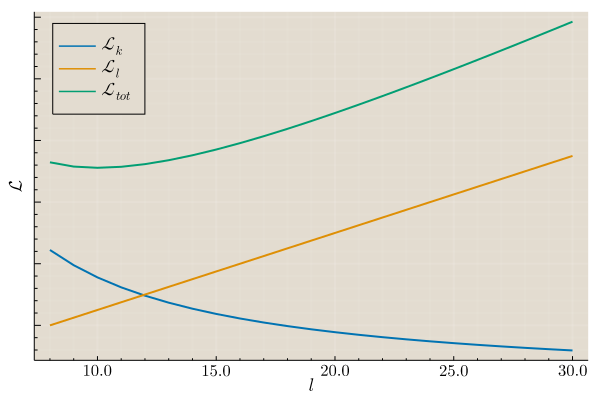

In [56]:
p_load = plot(
    8:30, 
    theoretical_load(κ, F0)[1], 
    linewidth=2, 
    label=L"\mathcal{L}_k", 
    legendfontsize=12, 
    legend=:topleft, 
    xlabel=L"l",
    ylabel=L"\mathcal{L}",
    labelfontsize=12,
    tickfontsize=11,
    yformatter=_->"",
    xformatter=x->latexstring("$x"),
    xminorticks=true,
    grid=true,
    minorgrid=2,
    gridlinewidth=2,
    gridcolor="white",
    minorgridcolor="white",
)

plot!(p_load, 8:30, [lambda(10, f0)/l0(10) * l for l in 8:30], linewidth=2, label=L"\mathcal{L}_l")
plot!(p_load, 8:30, theoretical_load(κ, F)[1], linewidth=2, label=L"\mathcal{L}_{tot}")

In [61]:
l_opt = [theoretical_load(κ, F)[2] for κ in 0:0.1:5]

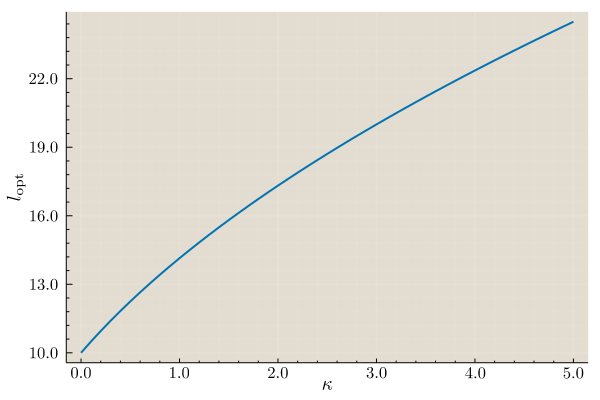

In [62]:
p_l = plot(
    legendfontsize=15, 
    legend=:topleft, 
    xlabel=L"$\kappa$",
    ylabel=L"$l_\mathrm{opt}$",
    labelfontsize=13,
    tickfontsize=11,
    xformatter=x->latexstring("$x"),
    yformatter=x->latexstring("$x"),
    yticks=collect(10:3:25),
    minorticks=true,
    grid=true,
    minorgrid=2,
    gridlinewidth=2,
    gridcolor="white",
    minorgridcolor="white"
    )

plot!(
    p_l, 
    0:0.1:5, 
    l_opt,
    linewidth=2
)

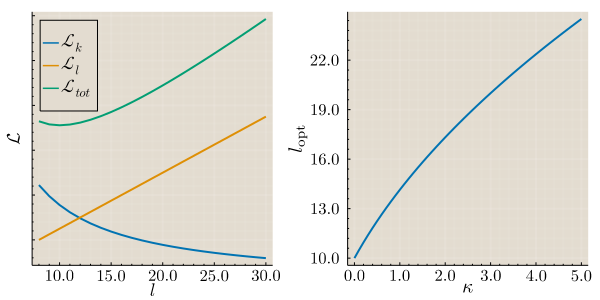

In [63]:
plot(p_load, p_l, size=(600, 300))

In [11]:
using Pkg
Pkg.status("Jedi")
Pkg.status("Jevo")
Pkg.status("Distributions")
Pkg.status("Plots")
Pkg.status("Turing")
Pkg.status("Measures")
Pkg.status("JLD")
Pkg.status("LambertW")
Pkg.status("CSV")

println("Julia Version: ", VERSION)

Status `~/.julia/environments/v1.5/Project.toml`
  [b681c197] Jedi v0.1.0 `../../../git/Jedi.jl`
Status `~/.julia/environments/v1.5/Project.toml`
  [49da04e1] Jevo v0.1.0 `../../../git/Jevo.jl`
Status `~/.julia/environments/v1.5/Project.toml`
  [31c24e10] Distributions v0.23.12
Status `~/.julia/environments/v1.5/Project.toml`
  [91a5bcdd] Plots v1.9.1
Status `~/.julia/environments/v1.5/Project.toml`
  [fce5fe82] Turing v0.15.0
Status `~/.julia/environments/v1.5/Project.toml`
  [442fdcdd] Measures v0.3.1
Status `~/.julia/environments/v1.5/Project.toml`
  [4138dd39] JLD v0.10.0
Status `~/.julia/environments/v1.5/Project.toml`
  [984bce1d] LambertW v0.4.5
Status `~/.julia/environments/v1.5/Project.toml`
  [336ed68f] CSV v0.8.2
Julia Version: 1.5.1
